In [33]:
library(plotly)
library(dplyr)

Loading required package: ggplot2


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [1]:
df <- read.csv('2008.csv.bz2')
head(df)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,...,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,2008,1,3,4,2003,1955,2211,2225,WN,335,...,4,8,0,,0,NA,NA,NA,NA,NA
2,2008,1,3,4,754,735,1002,1000,WN,3231,...,5,10,0,,0,NA,NA,NA,NA,NA
3,2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,,0,NA,NA,NA,NA,NA
4,2008,1,3,4,926,930,1054,1100,WN,1746,...,3,7,0,,0,NA,NA,NA,NA,NA
5,2008,1,3,4,1829,1755,1959,1925,WN,3920,...,3,10,0,,0,2,0,0,0,32
6,2008,1,3,4,1940,1915,2121,2110,WN,378,...,4,10,0,,0,NA,NA,NA,NA,NA


In [9]:
dim(df)

[1] 7009728      29

In [10]:
nrow(df)

[1] 7009728

In [11]:
ncol(df)

[1] 29

In [12]:
colnames(df)

[1] "Year"              "Month"             "DayofMonth"       
 [4] "DayOfWeek"         "DepTime"           "CRSDepTime"       
 [7] "ArrTime"           "CRSArrTime"        "UniqueCarrier"    
[10] "FlightNum"         "TailNum"           "ActualElapsedTime"
[13] "CRSElapsedTime"    "AirTime"           "ArrDelay"         
[16] "DepDelay"          "Origin"            "Dest"             
[19] "Distance"          "TaxiIn"            "TaxiOut"          
[22] "Cancelled"         "CancellationCode"  "Diverted"         
[25] "CarrierDelay"      "WeatherDelay"      "NASDelay"         
[28] "SecurityDelay"     "LateAircraftDelay"

In [13]:
str(df)

'data.frame':	7009728 obs. of  29 variables:
 $ Year             : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  3 3 3 3 3 3 3 3 3 3 ...
 $ DayOfWeek        : int  4 4 4 4 4 4 4 4 4 4 ...
 $ DepTime          : int  2003 754 628 926 1829 1940 1937 1039 617 1620 ...
 $ CRSDepTime       : int  1955 735 620 930 1755 1915 1830 1040 615 1620 ...
 $ ArrTime          : int  2211 1002 804 1054 1959 2121 2037 1132 652 1639 ...
 $ CRSArrTime       : int  2225 1000 750 1100 1925 2110 1940 1150 650 1655 ...
 $ UniqueCarrier    : Factor w/ 20 levels "9E","AA","AQ",..: 18 18 18 18 18 18 18 18 18 18 ...
 $ FlightNum        : int  335 3231 448 1746 3920 378 509 535 11 810 ...
 $ TailNum          : Factor w/ 5374 levels "","80009E","80019E",..: 3769 4129 1961 3059 2142 3852 4062 1961 3616 3324 ...
 $ ActualElapsedTime: int  128 128 96 88 90 101 240 233 95 79 ...
 $ CRSElapsedTime   : int  150 145 90 90 90 115 250 

In [16]:
summary(df)

      Year          Month          DayofMonth      DayOfWeek    
 Min.   :2008   Min.   : 1.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:2008   1st Qu.: 3.000   1st Qu.: 8.00   1st Qu.:2.000  
 Median :2008   Median : 6.000   Median :16.00   Median :4.000  
 Mean   :2008   Mean   : 6.375   Mean   :15.73   Mean   :3.924  
 3rd Qu.:2008   3rd Qu.: 9.000   3rd Qu.:23.00   3rd Qu.:6.000  
 Max.   :2008   Max.   :12.000   Max.   :31.00   Max.   :7.000  
                                                                
    DepTime         CRSDepTime      ArrTime         CRSArrTime  
 Min.   :   1     Min.   :   0   Min.   :   1     Min.   :   0  
 1st Qu.: 928     1st Qu.: 925   1st Qu.:1107     1st Qu.:1115  
 Median :1325     Median :1320   Median :1512     Median :1517  
 Mean   :1334     Mean   :1326   Mean   :1481     Mean   :1495  
 3rd Qu.:1728     3rd Qu.:1715   3rd Qu.:1909     3rd Qu.:1907  
 Max.   :2400     Max.   :2359   Max.   :2400     Max.   :2400  
 NA's   :136246          

# The tasks

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- ___EV___ 

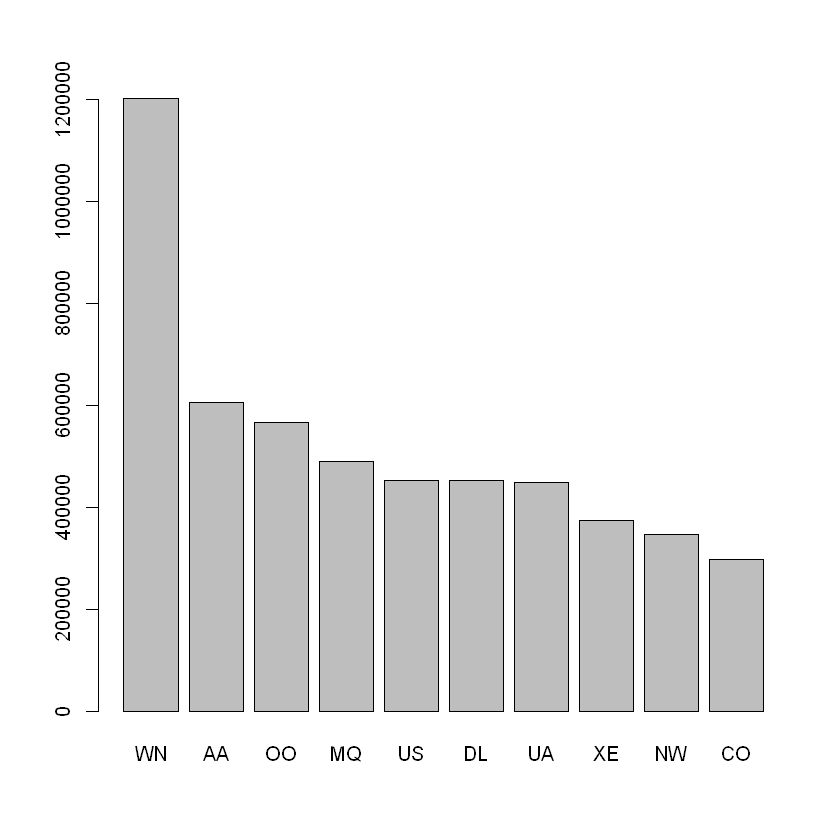

In [31]:
barplot(sort(table(df['UniqueCarrier']), decreasing = TRUE)[0:10])

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- ___weather conditions___ 
- National Air System
- security reasons

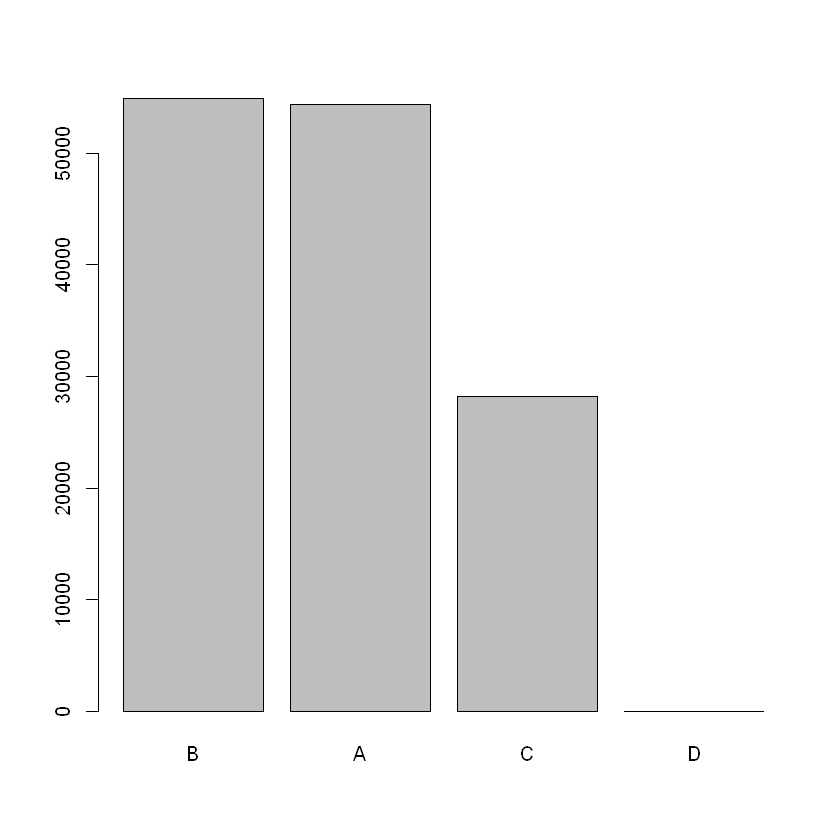

In [39]:
barplot(sort(table(df['CancellationCode']), decreasing=TRUE)[2:5])

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - ___San-Francisco – Los-Angeles___ 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [77]:
df2 <- df %>% group_by(Origin, Dest) %>% summarise(count = n()) %>% arrange(desc(count))
df2[df2$count == max(df2$count),]

Origin,Dest,count
<fct>,<fct>,<int>
SFO,LAX,13788


**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- ___668___ 

In [96]:
filter(df, DepDelay>0) %>% group_by(Origin, Dest) %>% summarize(count = n(), w = length(which(WeatherDelay > 0))) %>% arrange(desc(count)) %>% .[1:5, 'w'] %>% sum()

[1] 668

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - ___In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.___

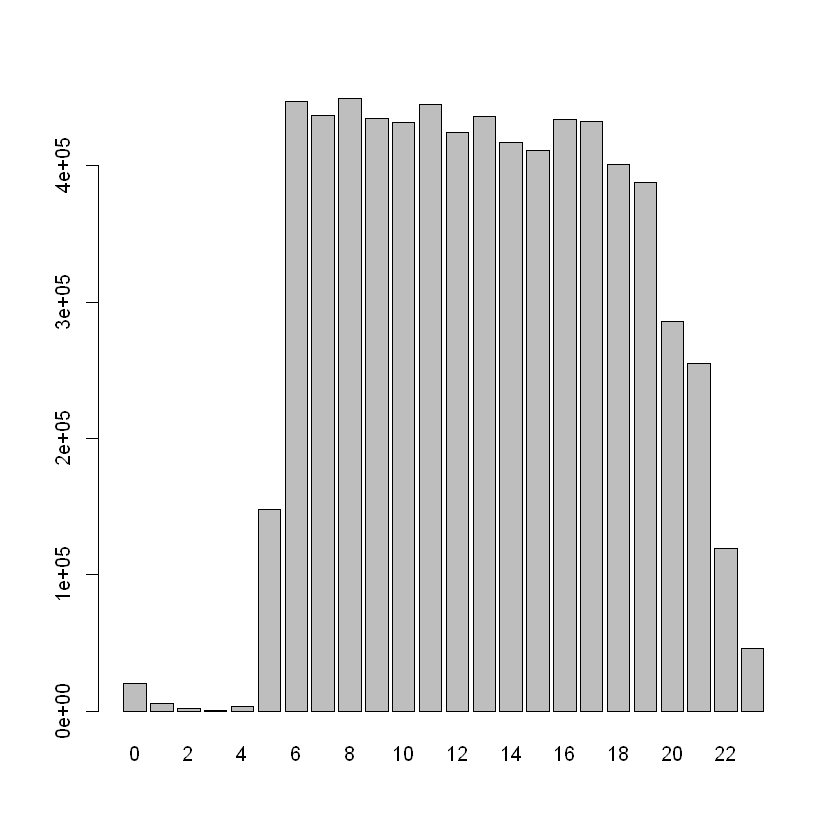

In [6]:
df3 <- df[!is.na(df['DepTime']), c('DepTime','Year')]
df3$DepTime <- sapply(df3$DepTime, function(x) (x %/% 100) %% 24)
barplot(table(df3['DepTime']))

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- ___The number of flights during weekends is less than during weekdays (working days).___
- The lowest number of flights is on Sunday.
- ___There are less flights during winter than during summer.___

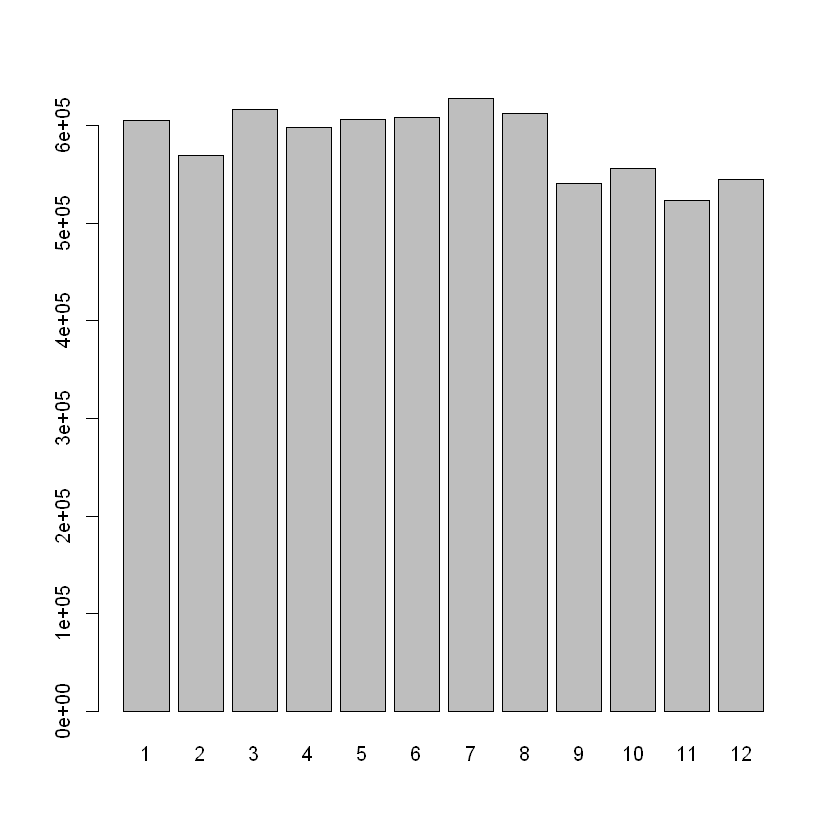

In [7]:
barplot(table(df['Month']))

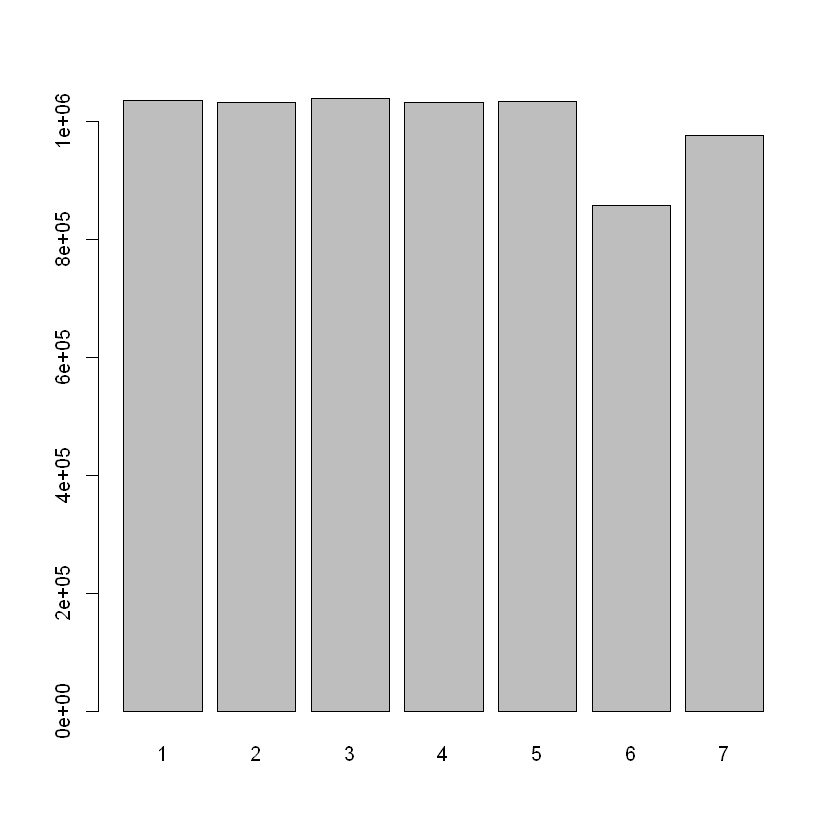

In [8]:
barplot(table(df['DayOfWeek']))

In [19]:
table(df['Month'])
table(df['Month'])[1] + table(df['Month'])[2] + table(df['Month'])[12] < table(df['Month'])[6] + table(df['Month'])[7] + table(df['Month'])[8]


     1      2      3      4      5      6      7      8      9     10     11 
605765 569236 616090 598126 606293 608665 627931 612279 540908 556205 523272 
    12 
544958 

1 
TRUE

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- ___December has the highest rate of cancellations due to weather.___ 
- The highest rate of cancellations in September is due to Security reasons.
- ___April's top cancellation reason is carriers.___
- Flights cancellations due to National Air System are more frequent than those due to carriers.

CancellationCode,Month,n
<fct>,<int>,<int>
A,1,6635
A,2,6090
A,3,6038
A,4,7312
A,5,3157
A,6,4251
A,7,5292
A,8,3852
A,9,2246


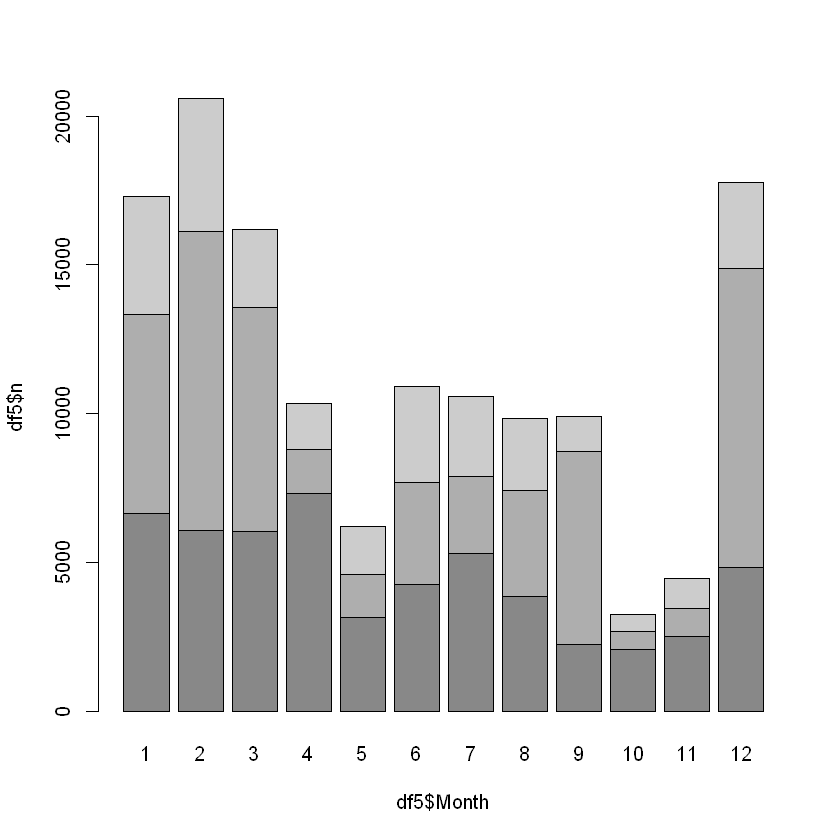

In [42]:
df4 <- df[df$Cancelled == 1, c('CancellationCode','Month')]
df5 <- df4 %>% group_by(CancellationCode, Month) %>% count(CancellationCode)
df5
barplot(formula = df5$n ~ df5$CancellationCode + df5$Month)
#black is 'A' (Carrier)
#grey is 'B' (Weather)
#light-grey is 'C' (National Air System)

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- ___April___ 

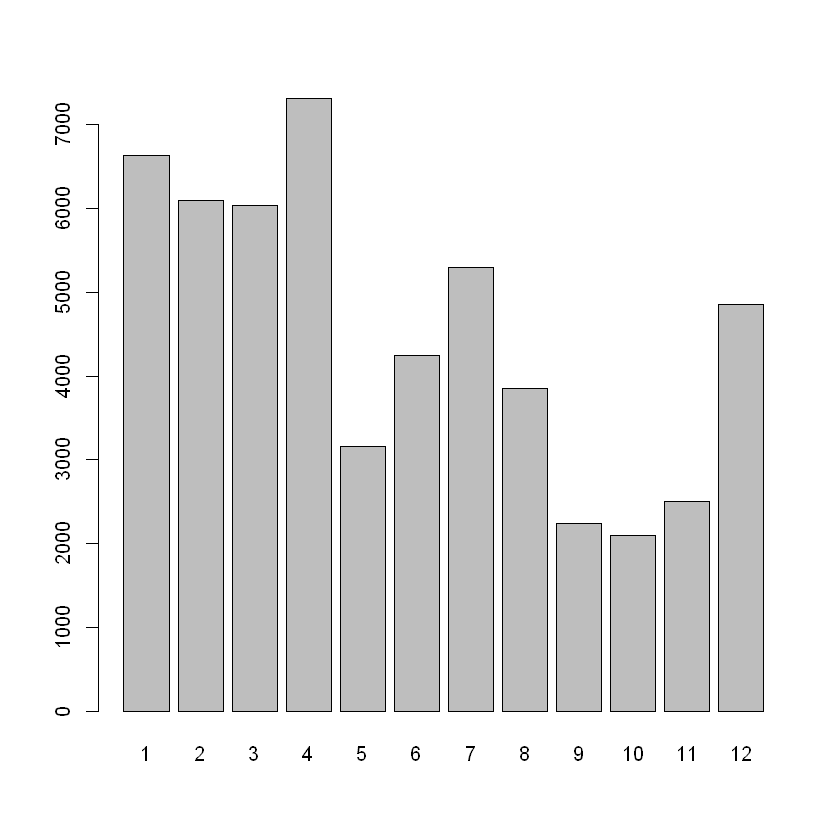

In [44]:
df6 <- filter(df, CancellationCode == 'A')
barplot(table(df6['Month']))

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- ___AA___

In [53]:
sort(table(df6['UniqueCarrier']), decreasing = TRUE)[1]

AA 
9609

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- ___AQ___

In [89]:
df %>% filter(ArrDelay > 0) %>% group_by(UniqueCarrier) %>% summarize(n = median(ArrDelay)) %>% arrange(n) %>% .[1, ]

UniqueCarrier,n
<fct>,<dbl>
AQ,5


In [55]:
df %>% filter(DepDelay > 0) %>% group_by(UniqueCarrier) %>% summarize(n = median(DepDelay)) %>% arrange(n) %>% .[1, ]

UniqueCarrier,n
<fct>,<dbl>
AQ,7


In [87]:
arr_outliers <- quantile(df$DepDelay, 0.95, na.rm = TRUE)
arr_outliers
df7 <- df[!is.na(df$ArrDelay) & 0 < df$ArrDelay & df$ArrDelay <= arr_outliers, c('ArrDelay', 'UniqueCarrier')]

95% 
 70

In [88]:
dep_outliers <- quantile(df$DepDelay, 0.95, na.rm = TRUE)
dep_outliers
df8 <- df[!is.na(df$DepDelay) & 0 < df$DepDelay & df$DepDelay <= dep_outliers, c('DepDelay', 'UniqueCarrier')]

95% 
 70

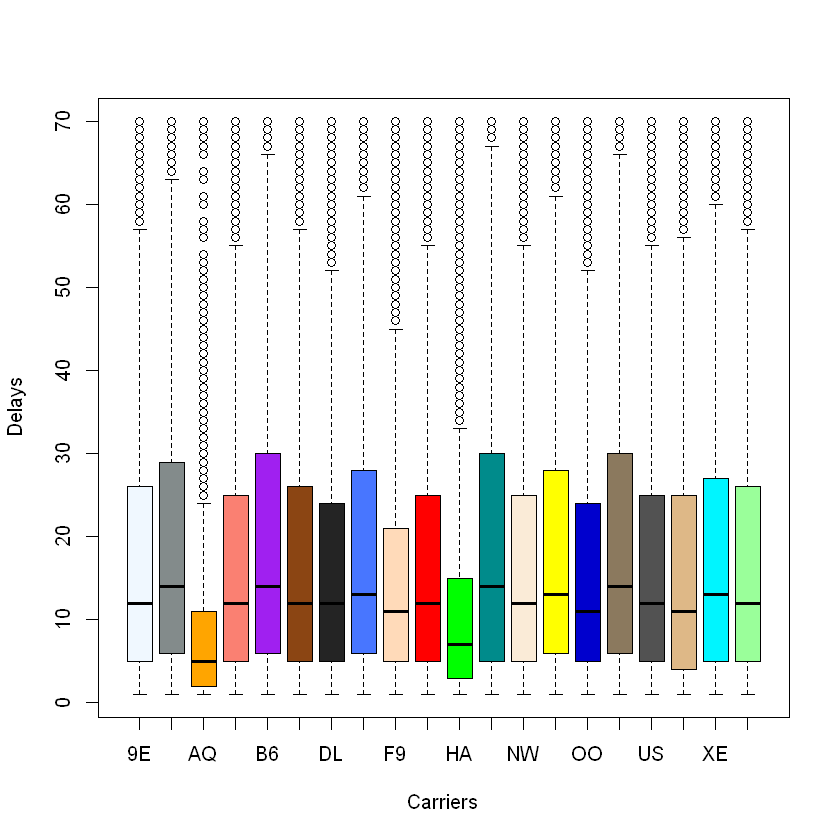

In [82]:
boxplot(df7$ArrDelay~df7$UniqueCarrier, xlab="Carriers", ylab="Delays",
        col=c("aliceblue", "azure4", "orange", "salmon", "purple", "chocolate4", "gray14", "royalblue1", "peachpuff", "red", "green",
              "cyan4", "antiquewhite", "yellow", "mediumblue", "navajowhite4", "gray32", "burlywood", "turquoise1", "palegreen1"))

In [76]:
table(df['UniqueCarrier'])


     9E      AA      AQ      AS      B6      CO      DL      EV      F9      FL 
 262208  604885    7800  151102  196091  298455  451931  280575   95762  261684 
     HA      MQ      NW      OH      OO      UA      US      WN      XE      YV 
  61826  490693  347652  197607  567159  449515  453589 1201754  374510  254930 

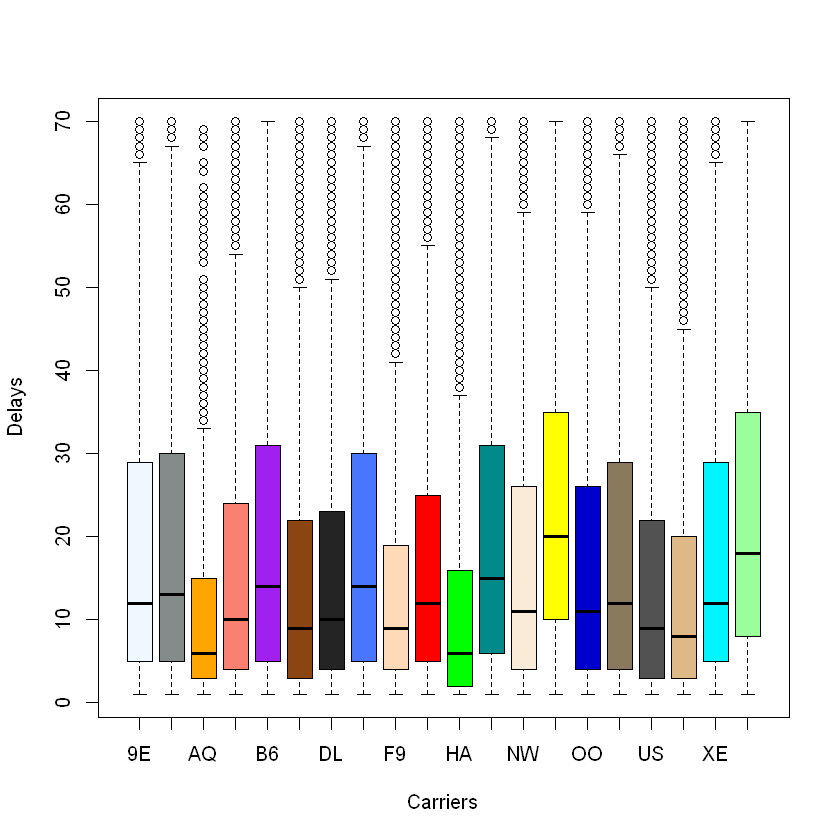

In [83]:
boxplot(df8$DepDelay~df8$UniqueCarrier, xlab="Carriers", ylab="Delays",
        col=c("aliceblue", "azure4", "orange", "salmon", "purple", "chocolate4", "gray14", "royalblue1", "peachpuff", "red", "green",
              "cyan4", "antiquewhite", "yellow", "mediumblue", "navajowhite4", "gray32", "burlywood", "turquoise1", "palegreen1"))